# To Do

- Consider adding counts to charts
- Consider having min/max plots track the full series
- Consider exception handling for multiple entries for the same activity on the same day (currently would produce duplicates)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None
import datetime
import numpy as np
import schemdraw
from schemdraw.flow import *

from get_data import read_files, create_dfs, build_daily_df, calculate_progress, get_daily_kpi_dfs
from charts import plot_cricket_1, plot_cricket_2, plot_cricket_3, plot_cricket_4,\
plot_x01_1, plot_x01_2, plot_x01_3,\
plot_min_daily, plot_max_daily, kpi_values, plot_diagram, plot_numbers

Load Data

In [2]:
# brand - stem material - stem length - flight micron - flight shape - flight brand
dart = 'Trinidad - cf - s - 100 - st - re'
pract_num = 3 # 10 eventually with more data
game_num = 20

# load excel sheets
# practice_df, game_df, target_df = read_files(dart)
practice_df, game_df, target_df = read_files()

# create dataframes and supply window for rolling means
trip_df, single_df, bull_df, double_df, minn_df, cricket_day_df, x01_day_df = \
    create_dfs(practice_df, game_df, rolling_practice=pract_num, rolling_game=game_num)

# create data dataframe
daily_df = build_daily_df(target_df, trip_df, single_df, bull_df, double_df, minn_df, cricket_day_df, x01_day_df,\
                          start_date=datetime.date(2024,5,1),end_date=datetime.date(2024,8,31))

# calculate achievement percentages
daily_df = calculate_progress(daily_df)

# get historical ranking dfs
min_kpi_df, max_kpi_df = get_daily_kpi_dfs(daily_df,start_date=datetime.date(2024,5,1),end_date=datetime.date(2024,8,31))

C:\Users\Dan\Desktop\Documents\Misc Documents\Other\Code Projects\darts_kpi\get_data.py:104: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  daily_df[column] = daily_df[column].fillna(method='ffill').fillna(method='bfill')


## Which parts of my game need work?

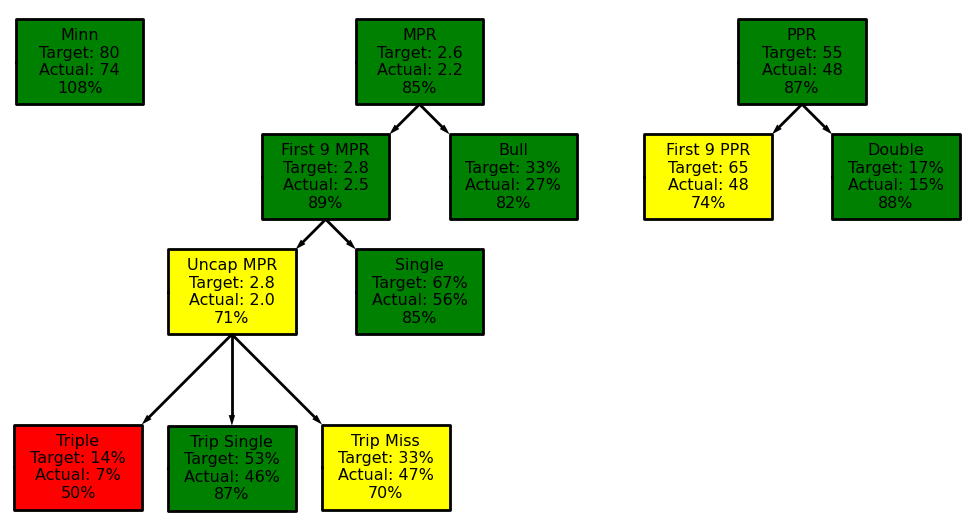

In [3]:
plot_diagram(daily_df)

## Which numbers specifically need work?

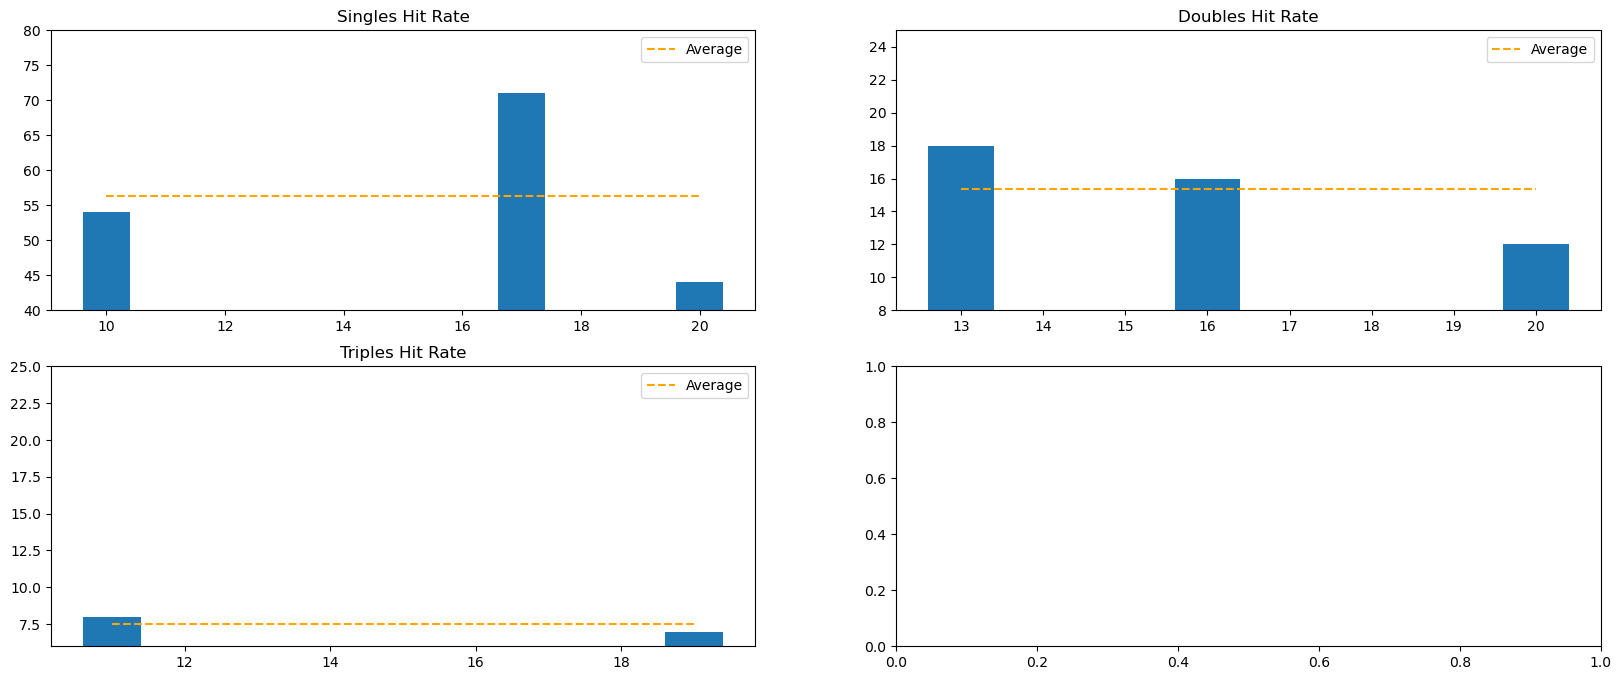

In [4]:
plot_numbers(practice_df)

## Which KPIs have been top/bottom?

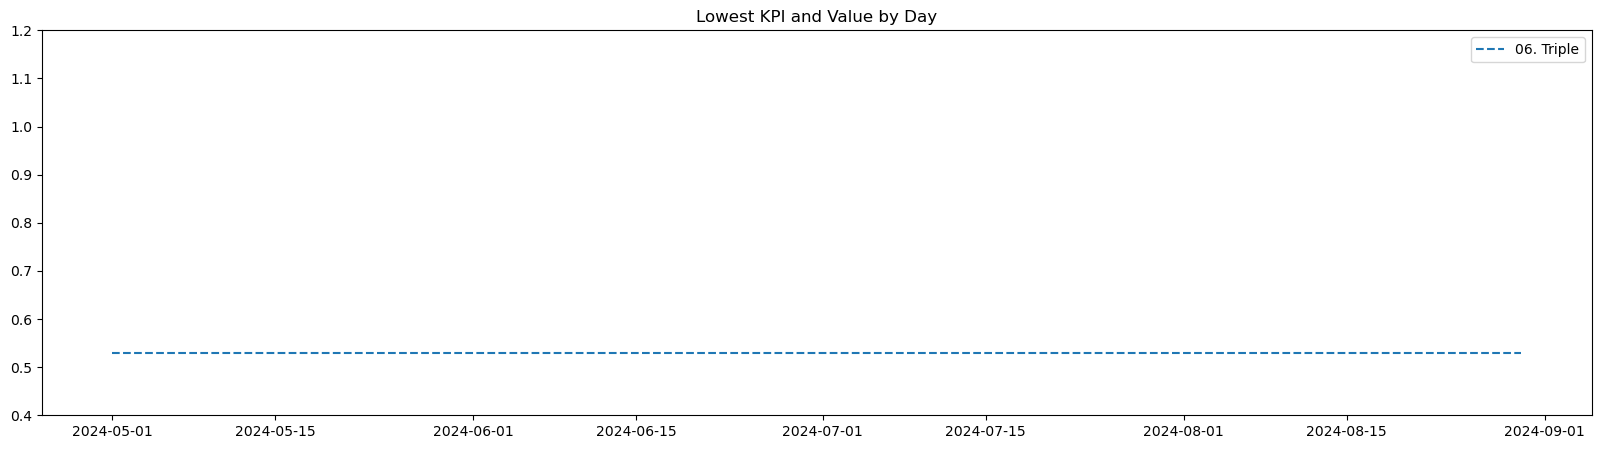

In [5]:
plot_min_daily(min_kpi_df)

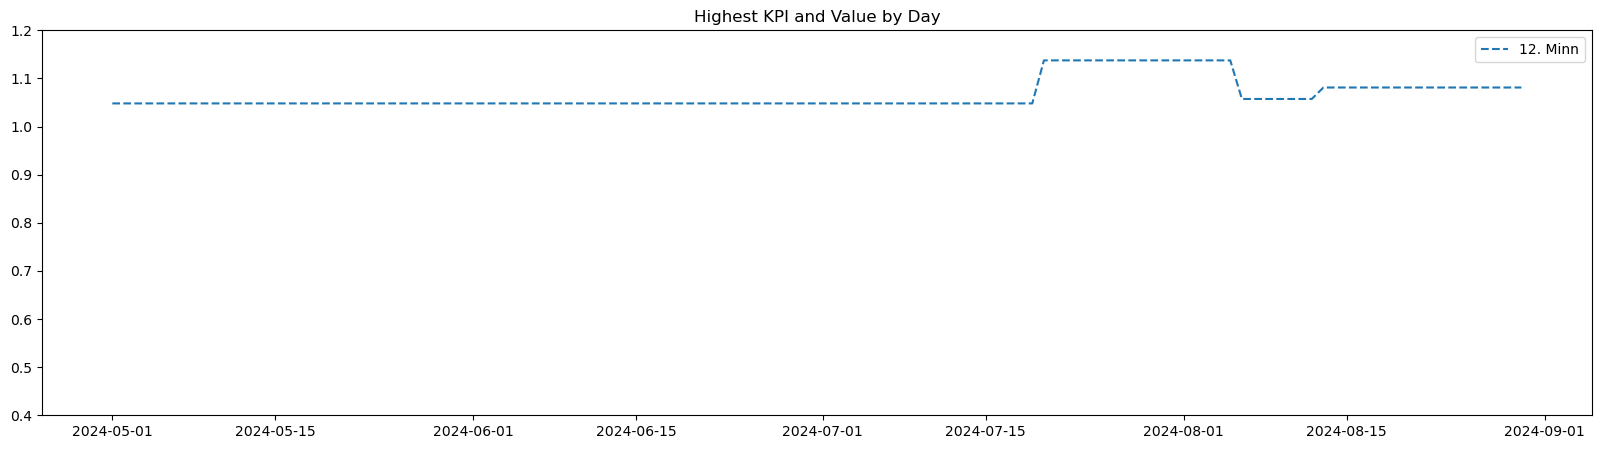

In [6]:
plot_max_daily(max_kpi_df)

## Cricket charts

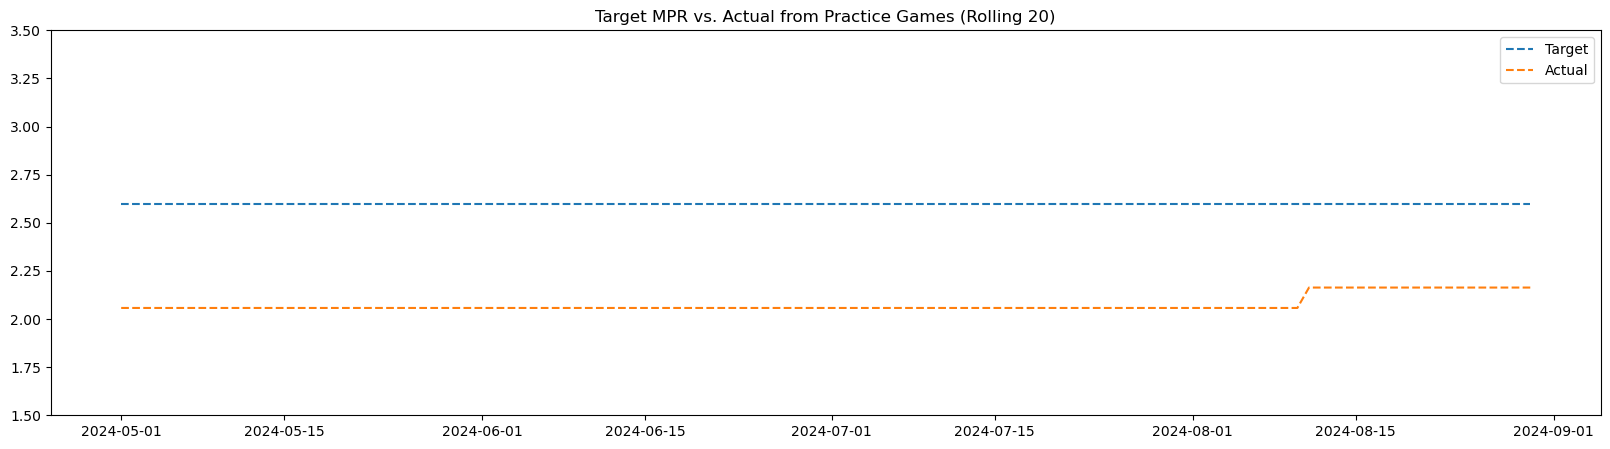

In [7]:
plot_cricket_1(daily_df, rolling_practice=10, rolling_game=20)

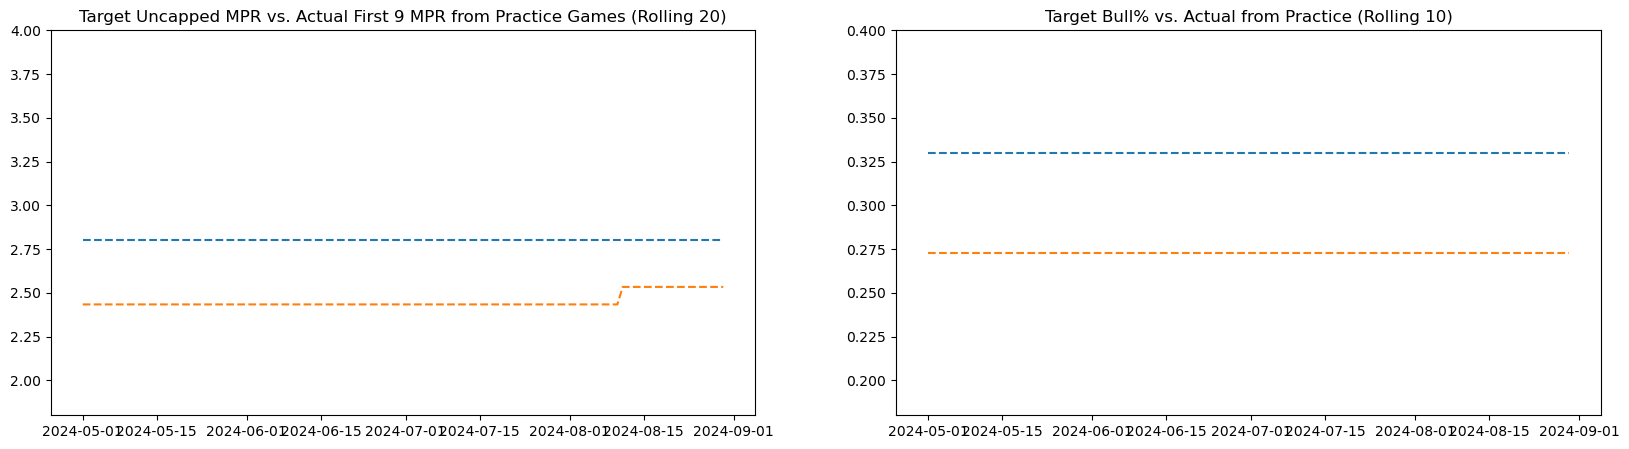

In [10]:
plot_cricket_2(daily_df, rolling_practice=10, rolling_game=20)

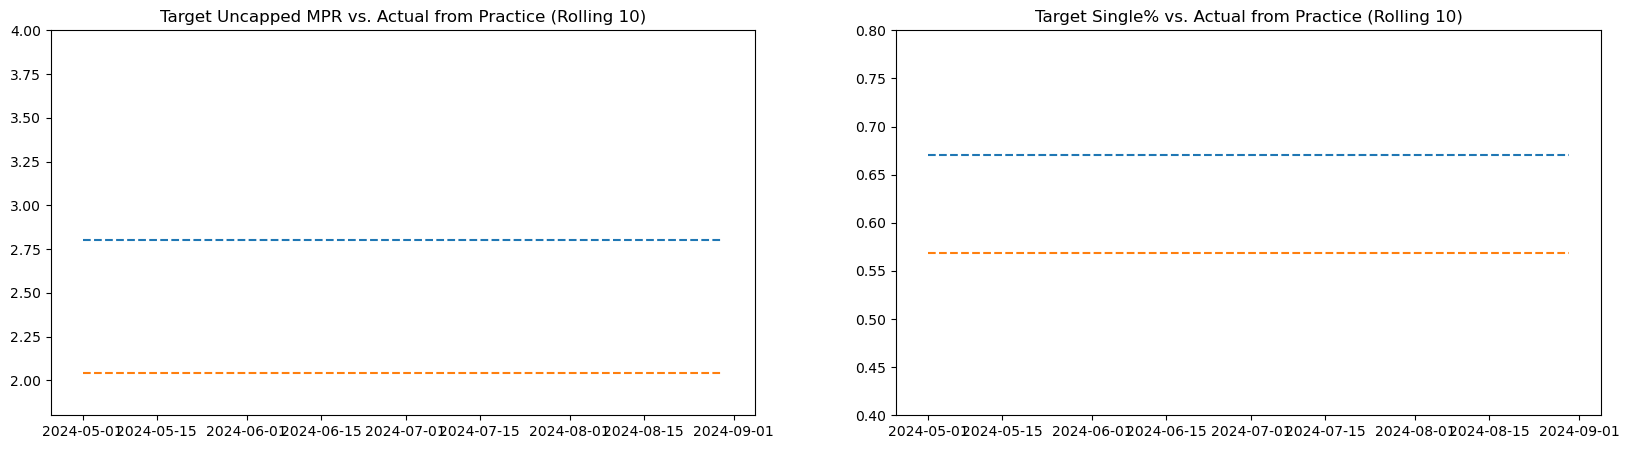

In [11]:
plot_cricket_3(daily_df, rolling_practice=10, rolling_game=20)

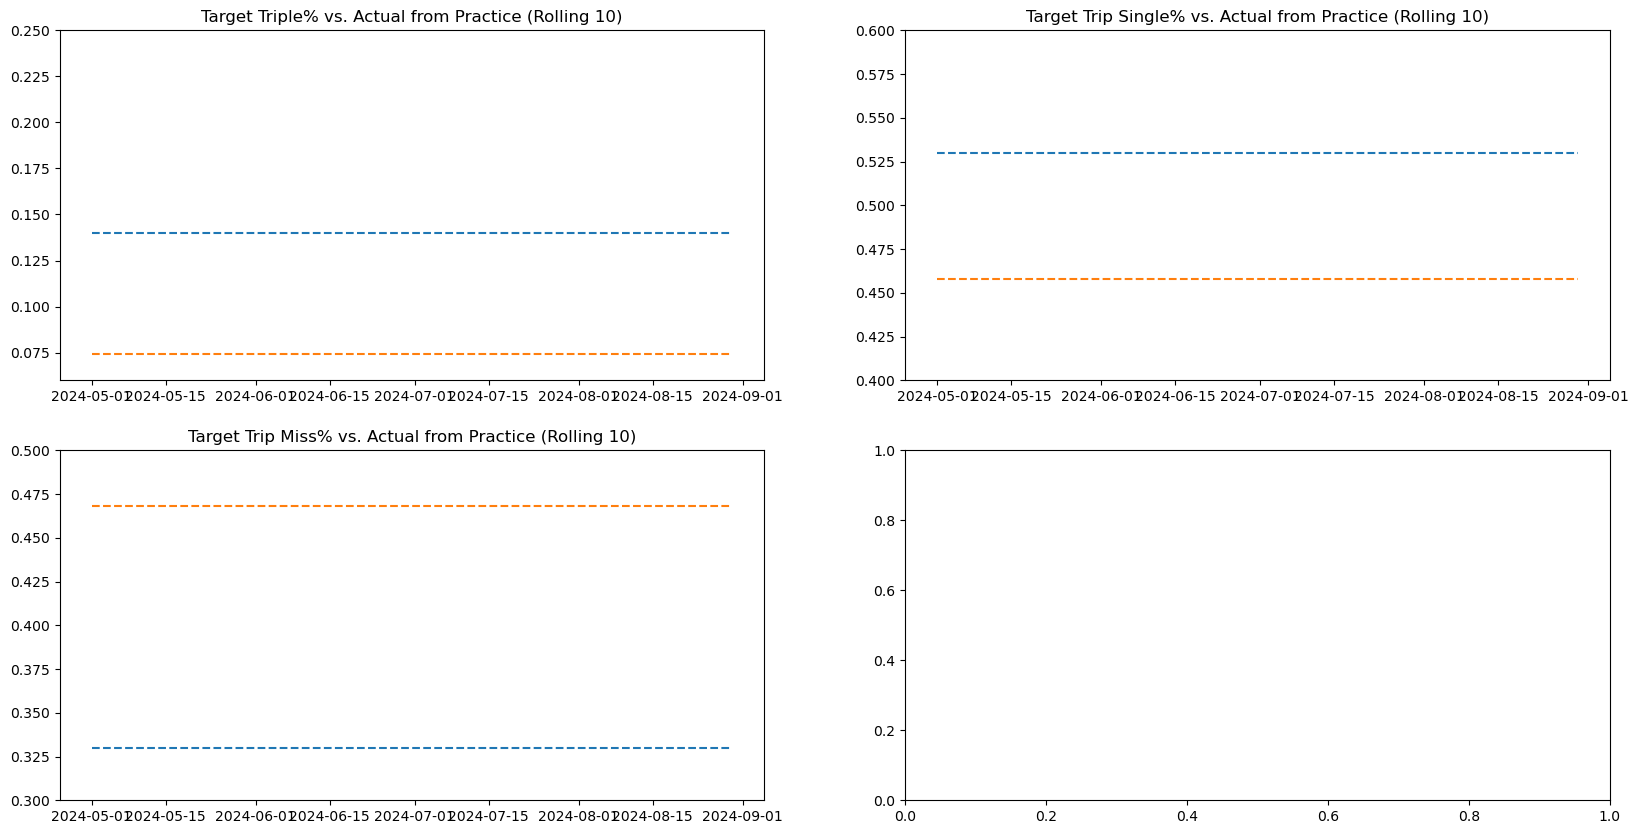

In [12]:
plot_cricket_4(daily_df, rolling_practice=10, rolling_game=20)

## 501 Charts

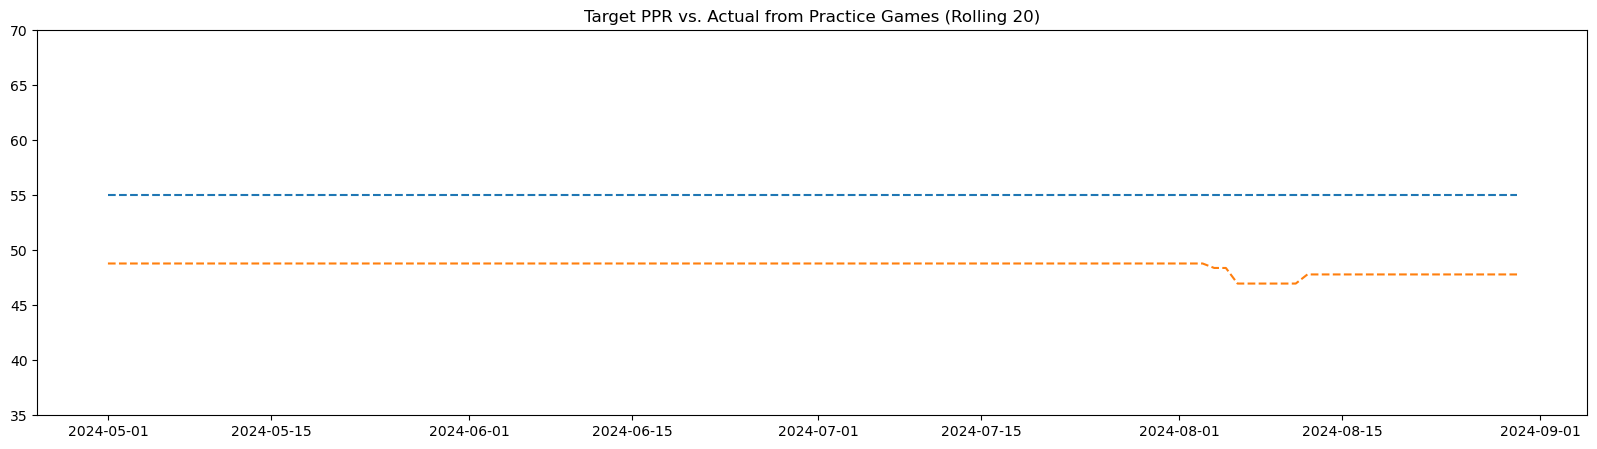

In [13]:
plot_x01_1(daily_df,rolling_practice=10,rolling_game=20)

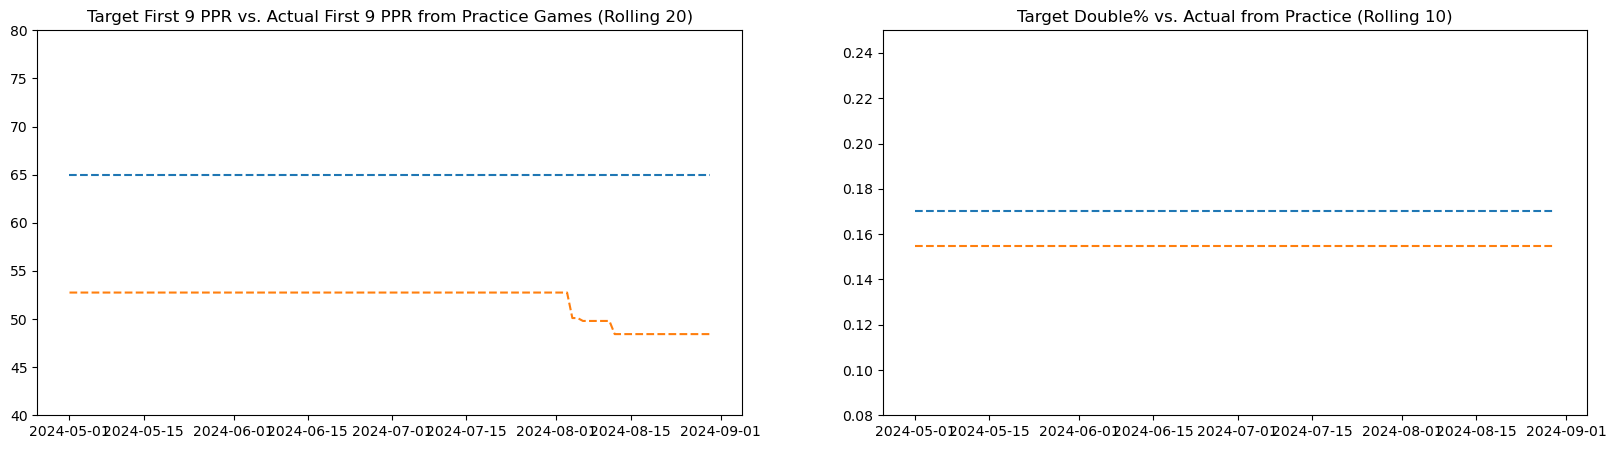

In [14]:
plot_x01_2(daily_df,rolling_practice=10,rolling_game=20)

C:\Users\Dan\Desktop\Documents\Misc Documents\Other\Code Projects\darts_kpi\charts.py:129: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  axs[1][1].plot(daily_df['Date'],(daily_df['first_9_ppr_r'].fillna(method='ffill').fillna(method='bfill')*3) -\
C:\Users\Dan\Desktop\Documents\Misc Documents\Other\Code Projects\darts_kpi\charts.py:130: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  (daily_df['trip_r'].fillna(method='ffill').fillna(method='bfill')*9*target*3) -\
C:\Users\Dan\Desktop\Documents\Misc Documents\Other\Code Projects\darts_kpi\charts.py:131: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  (daily_df['single_r'].fillna(method='ffill').fillna(method='bfill')*9*target),ls='--')


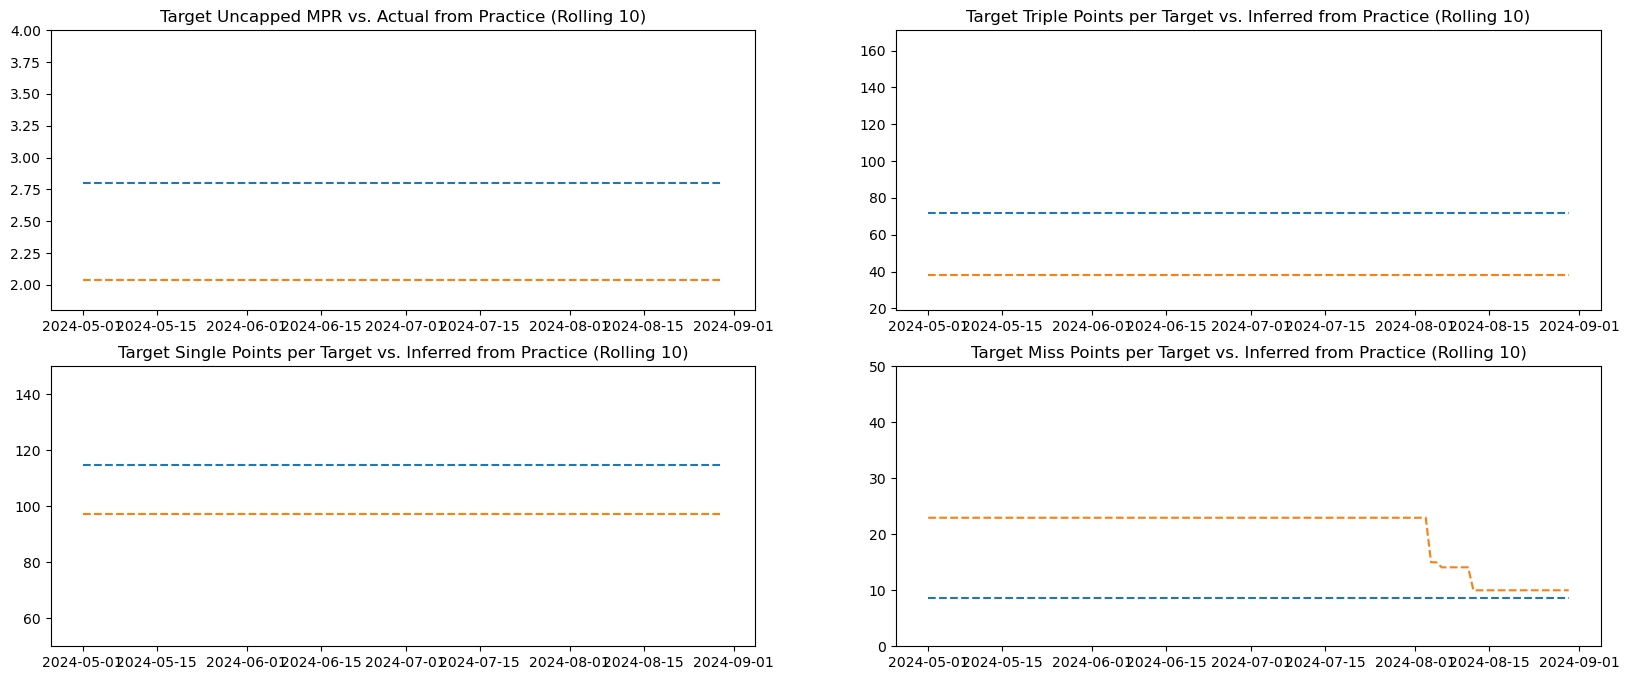

In [15]:
plot_x01_3(daily_df,rolling_practice=10,rolling_game=20)